In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartiflette import carti_download
import plotly.express as px

In [ ]:
df_patientele = pd.read_csv("Bases de données/patientele.csv", sep=";")
df_patientele['nombre_patients_uniques'] = df_patientele['nombre_patients_uniques'].astype(float)
df_patientele.columns = df_patientele.columns.str.replace("\ufeff", "", regex=False).str.strip()

df_patientele_2017 = df_patientele[df_patientele['annee'] == 2017]           

In [15]:
df_patientele.head()

,annee,profession_sante,region,libelle_region,departement,libelle_departement,nombre_patients_uniques,nombre_patients_medecin_traitant,vision generale all,vision_generale_prescriptions,vision profession territoire,patients_medecin_traitant_integer,patients_uniques_integer
0,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,39,Jura,1309,NC,oui,oui,oui,NaN,1309.0
1,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,58,Nièvre,2123,NC,oui,oui,oui,NaN,2123.0
2,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,89,Yonne,3634,NC,oui,oui,oui,NaN,3634.0
3,2017,Anesthésistes-réanimateurs,28,Normandie,14,Calvados,2512,NC,oui,oui,oui,NaN,2512.0
4,2017,Anesthésistes-réanimateurs,28,Normandie,76,Seine-Maritime,2938,NC,oui,oui,oui,NaN,2938.0


## Carte des pays différents

(np.float64(-5.876307480152819),
 np.float64(10.295160325375349),
 np.float64(40.84582809366395),
 np.float64(51.57675902873196))

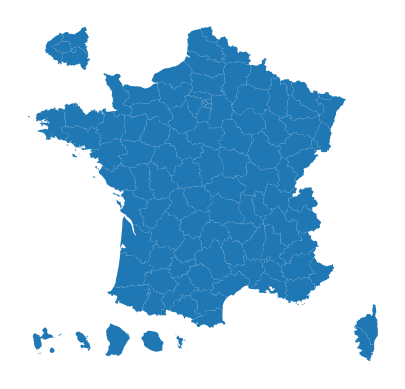

In [22]:
# Téléchargement des informations géospatiales des départements français (DROM compris)

departements = carti_download(
    values = ["France"],
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# On modifie le code des départements : on rajoute un 0 à ceux qui ont un code à deux chiffres
#departements['INSEE_DEP'] = departements['INSEE_DEP'].str.zfill(3)

# Test d'affichage de la carte
departements.plot().axis('off')

In [39]:
Carte_2017 = df_patientele_2017.copy()
Carte_2017['INSEE_DEP'] = Carte_2017['departement'].str[:3].astype(str)
Carte_2017 = departements.merge(Carte_2017, on='INSEE_DEP', how='left')

MergeError: Passing 'suffixes' which cause duplicate columns {'LIBELLE_DEPARTEMENT_y', 'SOURCE_y', 'geometry_y', 'POPULATION_y', 'PAYS_y'} is not allowed.

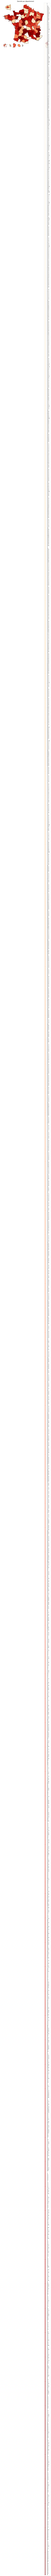

In [40]:
# Tracé pour l'année 2017
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Carte_2017.plot(
    column='nombre_patients_uniques', 
    cmap='OrRd',      
    linewidth=0.4,
    edgecolor='black',
    legend=True,       
    ax=ax
)

# On supprime les axes
ax.axis('off')  
ax.set_title("Densité par département", fontsize=15)
plt.show()